### 현대자동차 

### 0. 모델 평가척도 함수

In [1]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def evaluate_reg_all(y_test, y_predict):
    MSE = mean_squared_error(y_test,y_predict,squared=True)
    RMSE = mean_squared_error(y_test,y_predict,squared=False)
    MAE = mean_absolute_error(y_test,y_predict)
    R2 = r2_score(y_test,y_predict)
    
    print(f'MSE: {MSE:.3f}, RMSE: {RMSE:.3F}, MAE: {MAE:.3F}, R^2: {R2:.3F}')

### 0. EDA (데이터 탐색)

In [3]:
# 데이터 불러오기 
import pandas as pd 

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

1. 결측치 처리

In [6]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [8]:
# 결측값 확인
df_train.isnull().sum()

가격       0
년식       0
종류       0
연비       0
마력       0
토크       0
연료       0
하이브리드    0
배기량      0
중량       0
변속기      0
dtype: int64

In [9]:
df_test.isnull().sum()

가격       0
년식       0
종류       0
연비       0
마력       0
토크       0
연료       0
하이브리드    0
배기량      0
중량       0
변속기      0
dtype: int64

2. 중복값 처리

In [10]:
df_train.shape

(71, 11)

In [13]:
# 중복값 찾기
df_train[df_train.duplicated()]

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
16,1960,2015,대형,11.4,175,46.0,디젤,0,2497,1990,수동


In [14]:
# 중복값 제거해서 데이터 저장
from sklearn.pipeline import make_pipeline

In [17]:
# 중복값 제거한 후 확인
df_train.shape 

(70, 11)

In [18]:
df_train.to_csv('./data/train_pre.csv', index=False) # 가공완료 데이터 
# df_train = pd.read_csv('./data/train_pre.csv')

In [19]:
pd.read_csv('./data/train_pre.csv')

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
65,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
66,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
67,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
68,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


3.  이상치

In [20]:
df_train.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


<Axes: >

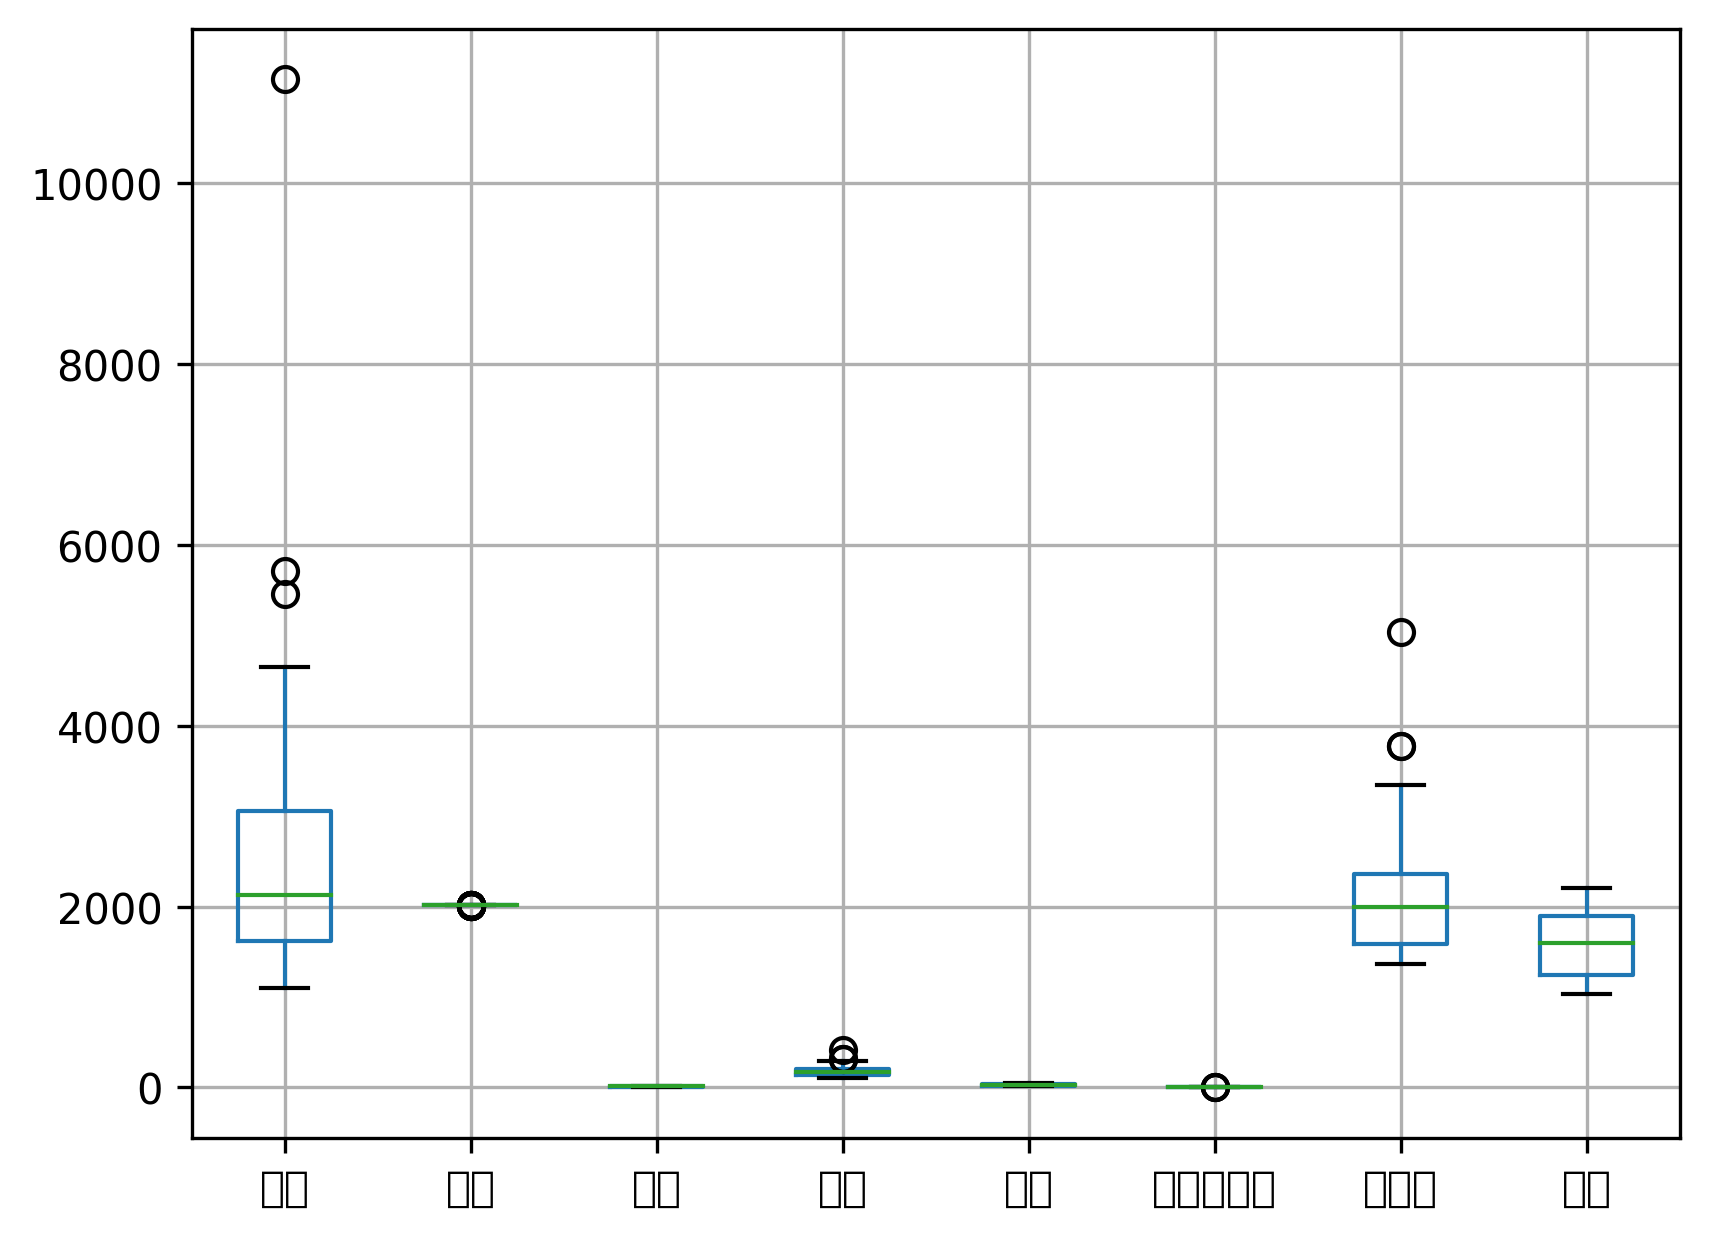

In [21]:
df_train.boxplot()

4. 인코딩

In [25]:
df_train

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [27]:
x_train = df_train.drop(['가격'], axis=1)
x_test = df_test.drop(['가격'], axis=1)
y_train = df_train['가격']
y_test = df_test['가격']

x_train.head()

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [34]:
# 데이터 인코딩 함수 만들기
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['종류', '연료', '변속기']), # 해당 컬럼에는 인코딩 진행
    remainder='passthrough') # 나머지는 통과 시킴


```
1.결측치 : df_train, df_test 모두 결측치는 존재하지 않음 
2.중복값 : df_train에 있는 중복값 하나 제거 (sweetviz를 통해 확인 가능)
3.이상치 : 가격(적은 수 이므로 점진적으로 수용하는 것으로 한다.) 년식, 마력, 하이브리드, 배기량 존재
4.인코딩: 종류, 연료, 변속기 인코딩 필요! 하이브리드(숫자이기는하나 범주형)
5. F&L 관계성 유무 : heatmap 분석 관계성이 있음 > 학습은 가능할 듯! 
```

### 1. 선형회귀분석_단순

In [36]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline # 한번에 

# 모델 생성
model = make_pipeline(transformer, LinearRegression())

# 모델 학습
model.fit(x_train, y_train)

# 모델 검증
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

y_predict = model.predict(x_test)
evaluate_reg_all(y_test, y_predict)

0.8849618214729725
0.7746849250515514
MSE: 1397856.930, RMSE: 1182.310, MAE: 570.120, R^2: 0.775


### 2. 의사결정트리

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# 모델생성
model = make_pipeline(transformer, DecisionTreeRegressor())

# 모델학습
model.fit(x_train, y_train)

# 모델검증

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

y_predict = model.predict(x_test)

evaluate_reg_all(y_test, y_predict)


1.0
0.9101686698309324
MSE: 557314.452, RMSE: 746.535, MAE: 356.839, R^2: 0.910


In [43]:
# 알고리즘의 플롯 만들고싶었는데 실패!
plt.figure(figsize=(15,10))
plot_tree(model,filled=True, feature_names= df_train.feature_names)

plt.show()

AttributeError: 'DataFrame' object has no attribute 'feature_names'

### 3.  K최근접 이웃 모델

In [44]:
from sklearn.neighbors import KNeighborsRegressor

# 모델생성
model = make_pipeline(transformer, KNeighborsRegressor())

# 모델학습
model.fit(x_train, y_train)

# 모델검증
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

# 모델예측
y_predict = model.predict(x_test)

evaluate_reg_all(y_test, y_predict)

0.7893994995666986
0.5894241447591622
MSE: 2547216.625, RMSE: 1596.000, MAE: 585.213, R^2: 0.589


In [45]:
from sklearn.neighbors import KNeighborsRegressor

# 모델생성
model = make_pipeline(transformer, KNeighborsRegressor(n_neighbors=3))

# 모델학습
model.fit(x_train, y_train)

# 모델검증
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))

# 모델예측
y_predict = model.predict(x_test)

evaluate_reg_all(y_test, y_predict)

0.8757861078168101
0.7031896016457044
MSE: 1841414.616, RMSE: 1356.987, MAE: 493.548, R^2: 0.703
